In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# import session_info
# session_info.show()

In [3]:
sc.settings.set_figure_params(dpi=80)

# Variables

In [4]:
adata_dir = '/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects'
sample_id = 'HEA_FOET14880396'

In [5]:
os.getcwd()

'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3'

# Read in data

In [6]:
adata= sc.read_h5ad(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltypist_coarse2midmod_colors', 'celltypist_coarse_colors', 'celltypist_coarse_fin_colors', 'celltypist_mid_fin_colors', 'celltypist_midmod

In [7]:
adata.X.data[:5]

array([1.27187559, 1.95641568, 1.75023687, 1.96760567, 2.7810601 ])

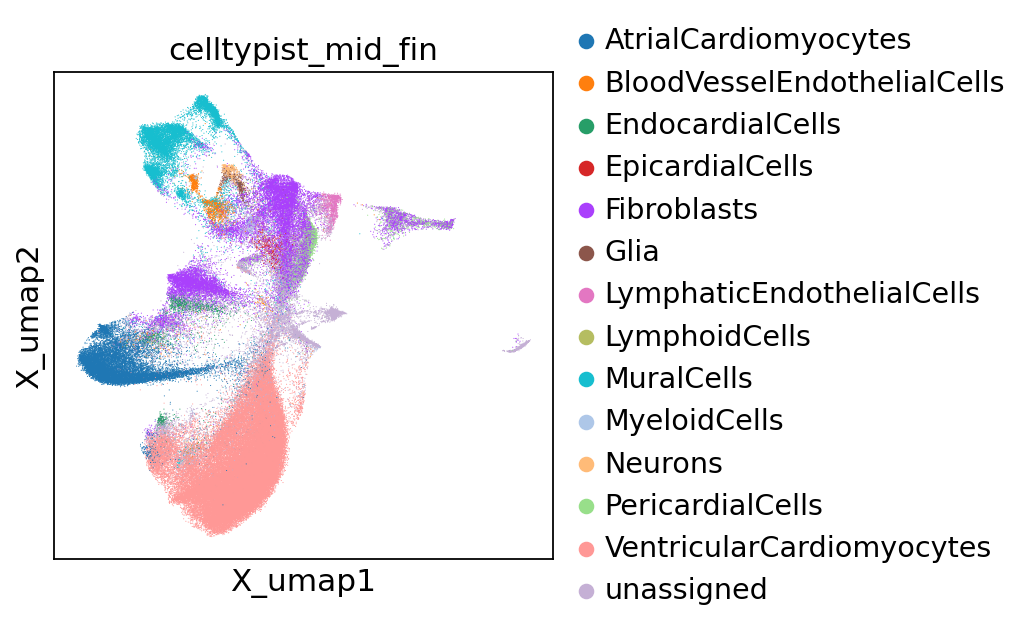

In [8]:
sc.pl.embedding(adata,
                    basis=f"X_umap",
                    color='celltypist_mid_fin',
                # groups='unassigned',
                   ncols=4
                   )

# Add fine-grained annotation

In [9]:
subset_adata_dir = '/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects/subsets'
fine_grain_colname = 'fine_grain_4Jan2025'

In [10]:
!ls {subset_adata_dir}

HEA_FOET14880396_AtrialCardiomyocytes_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_BloodVesselEndothelialCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_EndocardialCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_EpicardialCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_Fibroblasts_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_Glia_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_LymphaticEndothelialCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_LymphoidCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_MuralCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_MyeloidCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_Neurons_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_PericardialCells_b2c_cells_filtered_lognorm.h5ad
HEA_FOET14880396_VentricularCardiomyocytes_b2c_cells_filtered_lognorm.h5ad


In [11]:
adata.obs[fine_grain_colname] =  adata.obs['celltypist_mid_fin'].astype('str').copy()

In [12]:
file_list = os.listdir(subset_adata_dir)
celltypes_to_add = [x.split('_')[2] for x in file_list]
celltypes_to_add

['PericardialCells',
 'LymphaticEndothelialCells',
 'AtrialCardiomyocytes',
 'MuralCells',
 'BloodVesselEndothelialCells',
 'MyeloidCells',
 'EpicardialCells',
 'Fibroblasts',
 'LymphoidCells',
 'VentricularCardiomyocytes',
 'Glia',
 'Neurons',
 'EndocardialCells']

In [13]:
for celltype in celltypes_to_add:
    print(celltype)
    if celltype=='LymphaticEndothelialCells':
        print('skip since the label of mid-grain and fine-grain are same')
        continue
    ad = sc.read_h5ad(f'{subset_adata_dir}/{sample_id}_{celltype}_b2c_cells_filtered_lognorm.h5ad',backed='r')
    print(ad.shape)
    # add cell type labels
    adata.obs.loc[ad.obs_names,fine_grain_colname] = ad.obs['fine_grain_manual']
adata.obs[fine_grain_colname].value_counts()

PericardialCells
(3061, 15212)
LymphaticEndothelialCells
skip since the label of mid-grain and fine-grain are same
AtrialCardiomyocytes
(13904, 17650)
MuralCells
(10785, 17693)
BloodVesselEndothelialCells
(1765, 15377)
MyeloidCells
(526, 13502)
EpicardialCells
(603, 13050)
Fibroblasts
(20318, 17926)
LymphoidCells
(87, 10288)
VentricularCardiomyocytes
(61075, 17994)
Glia
(588, 13981)
Neurons
(589, 14494)
EndocardialCells
(1526, 14451)


fine_grain_4Jan2025
unassigned                                            35539
VentricularCardiomyocytesCompact                      32970
Fibroblasts                                            7849
VentricularCardiomyocytesTrabeculated                  6349
VentricularConductionSystemProximal                    5902
ValveInterstitialCells                                 5186
AtrialCardiomyocytesRight                              5060
GreatVesselSmoothMuscleCells                           4843
AtrialCardiomyocytesLeft                               3107
PericardialCellsFibrous                                2231
DuctusArteriosusSmoothMuscleCells                      2145
VentricularCardiomyocytes_DoubletsWithErythrocytes     1723
FibroblastsCOL2A1pos                                   1648
AtrioventricularNodePacemakerCells                     1602
GreatVesselSmoothMuscleCellsTFPI2pos                   1519
VentricularConductionSystemDistal                      1342
LymphaticEndothelial

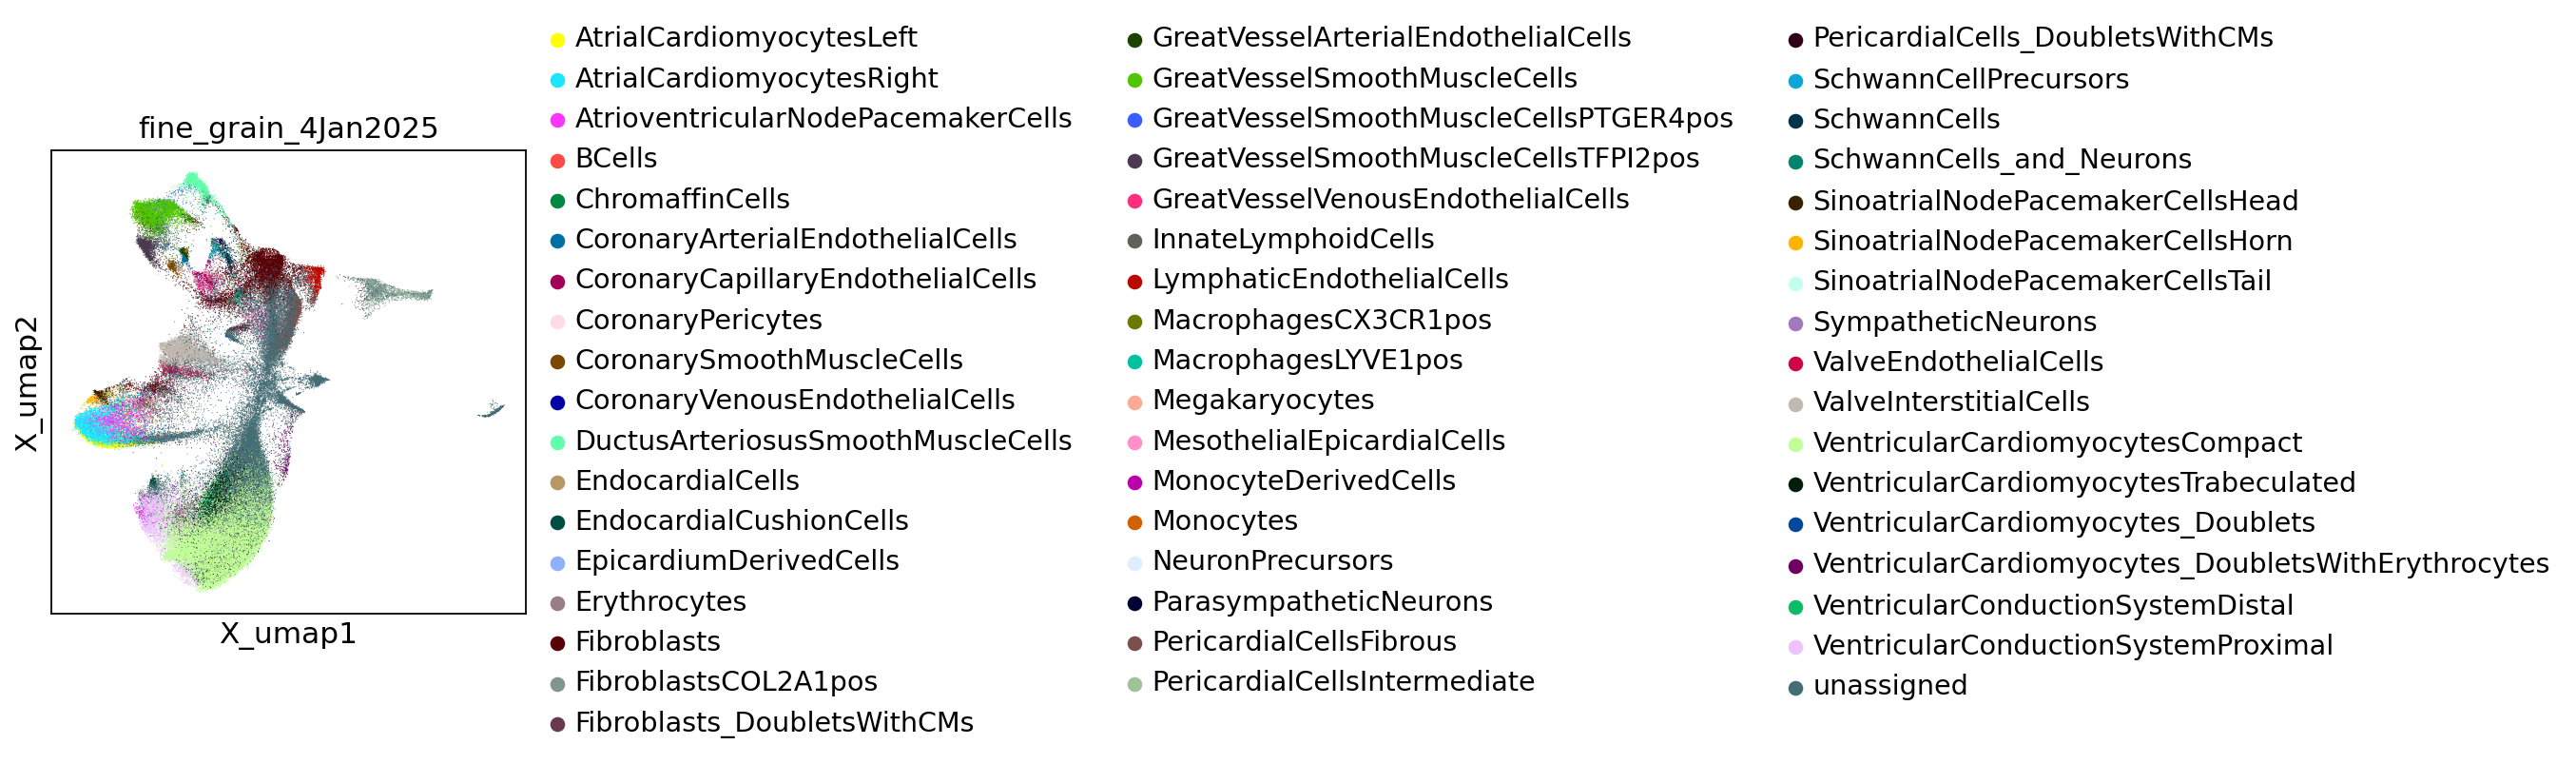

In [14]:
sc.pl.embedding(adata,basis='X_umap',color=[fine_grain_colname],wspace=0.2,cmap='RdPu')

# Save

In [15]:
adata.write(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad'

'/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects/HEA_FOET14880396_b2c_cells_filtered_lognorm.h5ad'

In [17]:
adata

AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_4Jan2025'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltypist_coarse2midmod_colors', 'celltypist_coarse_colors', 'celltypist_coarse_fin_colors', 'celltypist_mid_fin_colo

In [ ]:
adata= sc.read_h5ad(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

In [ ]:
cells = [
    'SinoatrialNodePacemakerCellsHorn',
    'SinoatrialNodePacemakerCellsHead',
    'SinoatrialNodePacemakerCellsTail',
    'AtrioventricularNodePacemakerCells',
    # 'VentricularConductionSystem'
    
    # 'MacrophagesCX3CR1pos',
    # 'ParasympatheticNeurons'
]

celltype_key = 'fine_grain_8Dec2024'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='magenta'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='deepskyblue'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsTail',)]='darkcyan'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('AtrioventricularNodePacemakerCells')]='orange'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('VentricularConductionSystem')]='mediumpurple'

sc.pl.spatial(adata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
cells = [
  'MacrophagesCX3CR1pos',
  'MacrophagesLYVE1pos',
    'MacrophagesTREM2pos',
]

celltype_key = 'fine_grain_8Dec2024'
'''
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='magenta'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='deepskyblue'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsTail',)]='darkcyan'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('AtrioventricularNodePacemakerCells')]='orange'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('VentricularConductionSystem')]='mediumpurple'
'''

sc.pl.spatial(adata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
cells = [
  'ParasympatheticNeurons',
  'SympatheticNeurons',
]

celltype_key = 'fine_grain_8Dec2024'
'''
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='magenta'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='deepskyblue'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsTail',)]='darkcyan'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('AtrioventricularNodePacemakerCells')]='orange'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('VentricularConductionSystem')]='mediumpurple'
'''

sc.pl.spatial(adata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
cells = [
     'SinoatrialNodePacemakerCellsHorn',
    'SinoatrialNodePacemakerCellsHead',
    'SinoatrialNodePacemakerCellsTail',
    'AtrioventricularNodePacemakerCells',
    # 'VentricularConductionSystem'
]
celltype_key = 'fine_grain_8Dec2024'

mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]
n_celltype = len(bdata.obs[celltype_key].cat.categories)
bdata.uns[celltype_key] = list(np.repeat('#ffff00',n_celltype))

# update colors
for c in cells:
    # get color in adata
    ind = list(adata.obs[celltype_key].cat.categories).index(c)
    color = adata.uns[f'{celltype_key}_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs[celltype_key].cat.categories).index(c)
    bdata.uns[f'{celltype_key}_colors'][ind] = color

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=2,legend_fontsize=30,# spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

In [ ]:
cells = [
     'MacrophagesCX3CR1pos',
  'MacrophagesLYVE1pos',
]
celltype_key = 'fine_grain_8Dec2024'

mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]
n_celltype = len(bdata.obs[celltype_key].cat.categories)
bdata.uns[celltype_key] = list(np.repeat('#ffff00',n_celltype))

# update colors
for c in cells:
    # get color in adata
    ind = list(adata.obs[celltype_key].cat.categories).index(c)
    color = adata.uns[f'{celltype_key}_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs[celltype_key].cat.categories).index(c)
    bdata.uns[f'{celltype_key}_colors'][ind] = color

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=2,legend_fontsize=30,# spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

In [ ]:
cells = [
    'ParasympatheticNeurons',
  # 'SympatheticNeurons',
]
celltype_key = 'fine_grain_8Dec2024'

mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]
n_celltype = len(bdata.obs[celltype_key].cat.categories)
bdata.uns[celltype_key] = list(np.repeat('#ffff00',n_celltype))

# update colors
for c in cells:
    # get color in adata
    ind = list(adata.obs[celltype_key].cat.categories).index(c)
    color = adata.uns[f'{celltype_key}_colors'][ind]
    # update color in bdata
    ind = list(bdata.obs[celltype_key].cat.categories).index(c)
    bdata.uns[f'{celltype_key}_colors'][ind] = color

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=2,legend_fontsize=30,# spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

In [ ]:
cells = [
    'ParasympatheticNeurons',
  'SchwannCellPrecursors',
    'SchwannCells',
   'SchwannCells_and_Neurons'
]

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=2,legend_fontsize=30,# spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

In [ ]:
cells = [
    'ParasympatheticNeurons',
  'SchwannCellPrecursors',
    'SchwannCells',
   'SchwannCells_and_Neurons'
]

celltype_key = 'fine_grain_8Dec2024'
mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=2,legend_fontsize=30,# spot_size=10,
                  frameon=False,) # save=f'_{c}_b2c',

In [ ]:
cells = [
   'ParasympatheticNeurons',
  'SchwannCellPrecursors',
    'SchwannCells',
   'SchwannCells_and_Neurons'
]

celltype_key = 'fine_grain_8Dec2024'
'''
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='magenta'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='deepskyblue'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsTail',)]='darkcyan'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('AtrioventricularNodePacemakerCells')]='orange'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('VentricularConductionSystem')]='mediumpurple'
'''

sc.pl.spatial(adata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=30,legend_fontsize=30,spot_size=10,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

# Gene expression

In [ ]:
genes = ['SEMA3A', 'SLIT2', 'SLIT3', 'EFNB2', 'CXCL12', 'FGF10', 'VEGFC', 'NELL1']
genes = [x for x in genes if x in adata.var_names]
genes

In [ ]:
sc.pl.spatial(adata, color=genes,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=30,legend_fontsize=0,spot_size=5,ncols=5,wspace=0.15,
                  frameon=False,cmap='viridis')

In [ ]:
mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, color=genes,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=30,legend_fontsize=0,spot_size=5,ncols=5,wspace=0.15,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
mask = ((adata.obs['array_row'] >= 1500) & 
        (adata.obs['array_row'] <= 2500) & 
        (adata.obs['array_col'] >= 400) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, color=genes,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=30,legend_fontsize=0,spot_size=5,ncols=5,wspace=0.15,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
cells = [
     'MacrophagesCX3CR1pos',
    'SinoatrialNodePacemakerCellsHorn',
  'SinoatrialNodePacemakerCellsHead',
    'ParasympatheticNeurons',
]
celltype_key = 'fine_grain_8Dec2024'

mask = ((adata.obs['array_row'] >= 2000) & 
        (adata.obs['array_row'] <= 2200) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 800)
       )
bdata = adata[mask]
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='magenta'
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='deepskyblue'
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('MacrophagesCX3CR1pos',)]='red'
bdata.uns[f"{celltype_key}_colors"][list(bdata.obs[celltype_key].cat.categories).index('ParasympatheticNeurons')]='purple'

sc.pl.spatial(bdata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=4,legend_fontsize=30,spot_size=10,alpha_img=0.3,
                  frameon=False,) # save=f'_{c}_b2c',

In [ ]:
cells = [
  'MacrophagesCX3CR1pos',
  'MacrophagesLYVE1pos',
    'MacrophagesTREM2pos',
]

celltype_key = 'fine_grain_8Dec2024'
'''
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHorn')]='magenta'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsHead')]='deepskyblue'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('SinoatrialNodePacemakerCellsTail',)]='darkcyan'
adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('AtrioventricularNodePacemakerCells')]='orange'
# adata.uns[f"{celltype_key}_colors"][list(adata.obs[celltype_key].cat.categories).index('VentricularConductionSystem')]='mediumpurple'
'''

sc.pl.spatial(adata, color=celltype_key, groups=cells,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=10,legend_fontsize=30,spot_size=10,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
genes = ['SHOX2', 'TBX3', 
         'GJA1', # CX43
         'GJA5', # CX40
         'RSPO3'
        ]
genes = [x for x in genes if x in adata.var_names]
genes

In [ ]:
mask = ((adata.obs['array_row'] >= 1700) & 
        (adata.obs['array_row'] <= 2300) & 
        (adata.obs['array_col'] >= 600) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, color=genes,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=30,legend_fontsize=0,spot_size=5,ncols=5,wspace=0.15,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',

In [ ]:
mask = ((adata.obs['array_row'] >= 1500) & 
        (adata.obs['array_row'] <= 2500) & 
        (adata.obs['array_col'] >= 400) & 
        (adata.obs['array_col'] <= 1200)
       )
bdata = adata[mask]

sc.pl.spatial(bdata, color=genes,
              img_key="0.3_mpp_150_buffer", basis="spatial_cropped_150_buffer",
              size=30,legend_fontsize=0,spot_size=5,ncols=5,wspace=0.15,
                  frameon=False,cmap='viridis') # save=f'_{c}_b2c',